<a href="https://www.kaggle.com/code/dilaraozcerit/airline-sentiment-analysis?scriptVersionId=98711799" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://colab.research.google.com/github/dilaraozcerit/NLP/blob/master/NLP_2_(NLP_Application_with_ML)(TR)_26_Mar_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Application with ML

## Classification of Tweets Data

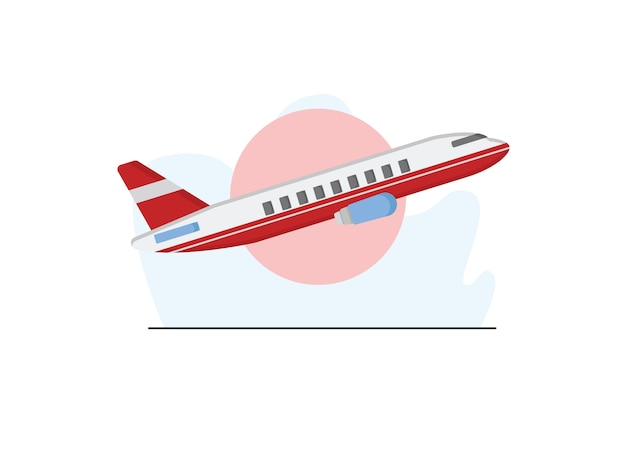

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,9)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("../input/twitter-airline-sentiment/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


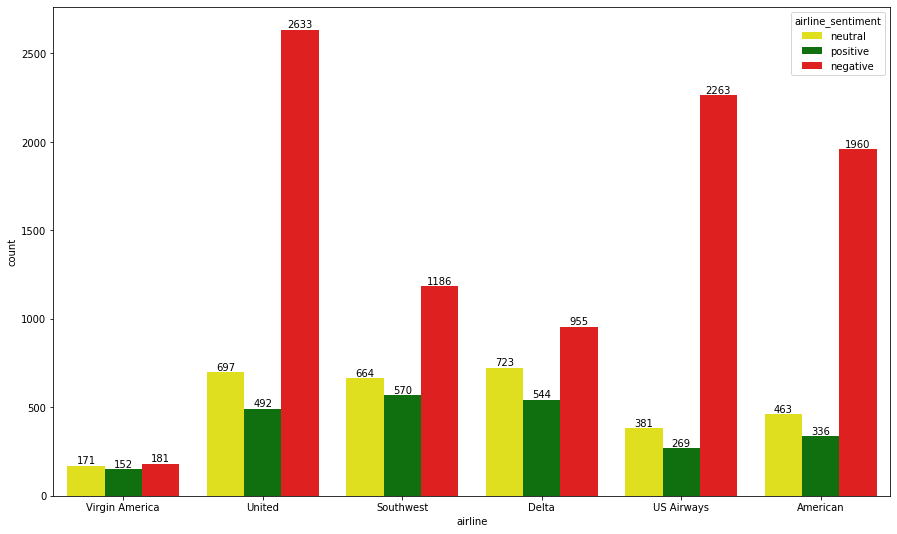

In [3]:
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment", palette=["yellow","green", "red"])
for p in ax.containers:
    ax.bar_label(p)

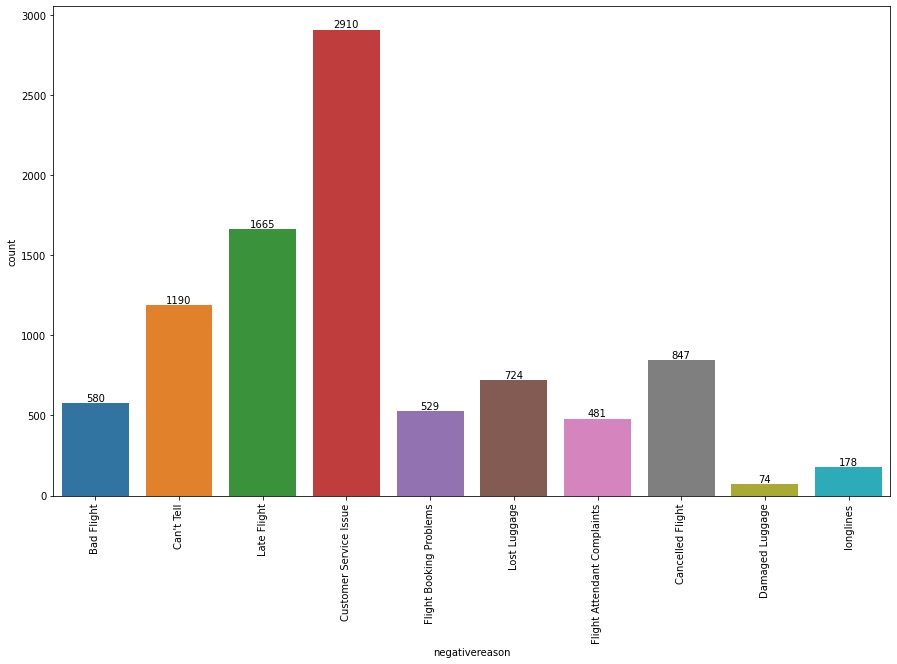

In [4]:
ax = sns.countplot(data =df, x ="negativereason")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);

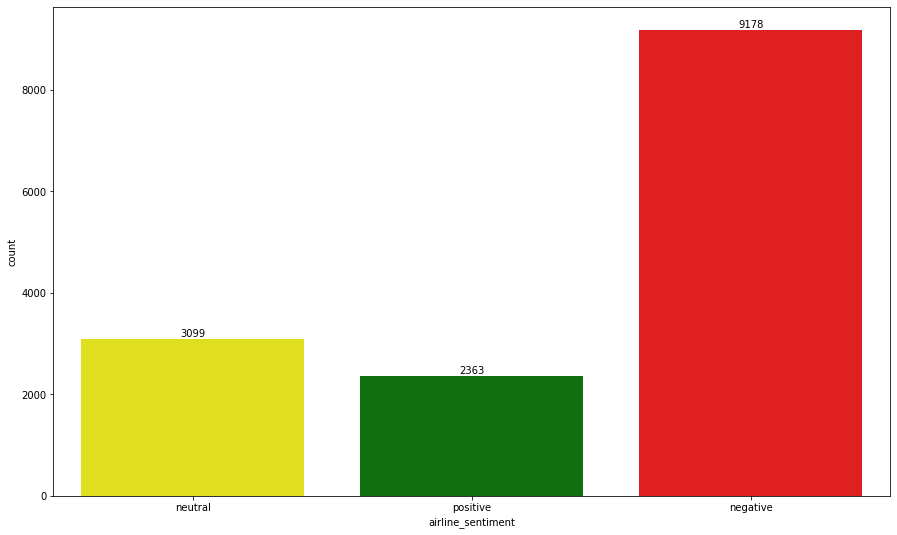

In [5]:
ax = sns.countplot(data =df, x = "airline_sentiment", palette=["yellow","green", "red"])
ax.bar_label(ax.containers[0]);

In [6]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Cleaning Data

In [7]:
df2 = df.copy()

In [8]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

## Cleaning Data

In [9]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [10]:
def cleaning(data):
    
    import re
    
    # To remove URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    # To remove Tags
    data = re.sub('#\S+', '', data).strip()

    # To remove Mentions
    data = re.sub('@\S+', '', data).strip()
    
    # To remove upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    # Tokenizing
    text_tokens = word_tokenize(data.lower())
    
    # To remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    # To removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    # Lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
cleaning_text = df2["text"].apply(cleaning)
cleaning_text.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Features and Label

In [13]:
df2 =df2[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df2["text"]
y = df2["airline_sentiment"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=54)

## Vectorization

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [19]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodating,accommodation,according,accordingly,...,yay,yea,yeah,year,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [22]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [24]:
nb = MultinomialNB(alpha=2)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=2)

In [25]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[2099  147   48]
 [ 360  346   69]
 [ 157   48  386]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.91      0.85      2294
     neutral       0.64      0.45      0.53       775
    positive       0.77      0.65      0.71       591

    accuracy                           0.77      3660
   macro avg       0.74      0.67      0.70      3660
weighted avg       0.76      0.77      0.76      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      6884
     neutral       0.73      0.55      0.62      2324
    positive       0.79      0.72      0.76      1772

    accuracy                           0.81     10980
   macro avg       0.78      0.73      0.75     10980
weighted avg       0.80      0.81      0.80     10980



In [26]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

model = MultinomialNB(alpha=2)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.757468
test_precision-neg    0.793300
test_recall-neg       0.902089
test_f1-neg           0.844149
dtype: float64

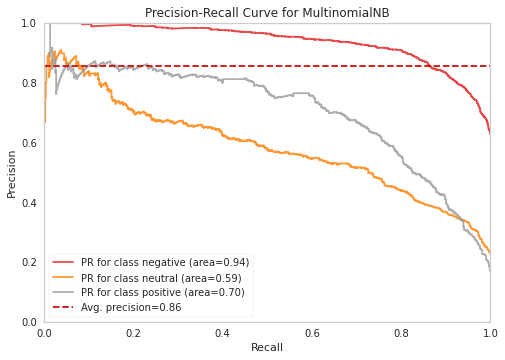

In [27]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=2),  
    classes=nb.classes_,  
    per_class=True,   
    cmap="Set1" 
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [28]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_AP_neg = viz.score_["negative"]

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.03, max_iter=1500) 
log.fit(X_train_count,y_train)

LogisticRegression(C=0.03, max_iter=1500)

In [30]:
print("LOGISTIC MODEL")
eval(log, X_train_count, X_test_count)

LOGISTIC MODEL
[[2172   85   37]
 [ 387  333   55]
 [ 209   75  307]]
Test_Set
              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      2294
     neutral       0.68      0.43      0.53       775
    positive       0.77      0.52      0.62       591

    accuracy                           0.77      3660
   macro avg       0.74      0.63      0.67      3660
weighted avg       0.76      0.77      0.75      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.80      0.96      0.87      6884
     neutral       0.75      0.49      0.59      2324
    positive       0.80      0.56      0.65      1772

    accuracy                           0.79     10980
   macro avg       0.78      0.67      0.71     10980
weighted avg       0.79      0.79      0.78     10980



In [31]:
model = LogisticRegression(C = 0.03, max_iter=1500)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# sonuçlar tutarlı

test_accuracy         0.762933
test_precision-neg    0.774304
test_recall-neg       0.948285
test_f1-neg           0.852496
dtype: float64

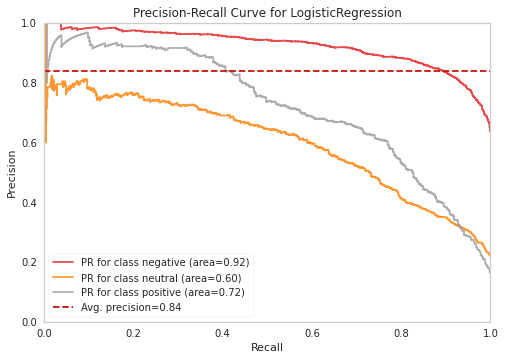

In [32]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.03, max_iter=1500),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [33]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = viz.score_["negative"]

## SVM

In [34]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.2)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.2)

In [35]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2053  181   60]
 [ 257  442   76]
 [  95   84  412]]
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      2294
     neutral       0.63      0.57      0.60       775
    positive       0.75      0.70      0.72       591

    accuracy                           0.79      3660
   macro avg       0.74      0.72      0.73      3660
weighted avg       0.79      0.79      0.79      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.92      0.96      0.94      6884
     neutral       0.84      0.77      0.80      2324
    positive       0.89      0.84      0.86      1772

    accuracy                           0.90     10980
   macro avg       0.88      0.85      0.87     10980
weighted avg       0.90      0.90      0.90     10980



In [36]:
model = LinearSVC(C=0.2)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.778780
test_precision-neg    0.842667
test_recall-neg       0.878992
test_f1-neg           0.860423
dtype: float64

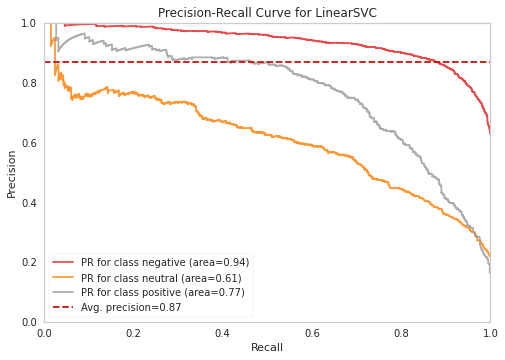

In [37]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.2),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [38]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = viz.score_["negative"]

## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[1145 1051   98]
 [ 129  591   55]
 [  88  204  299]]
Test_Set
              precision    recall  f1-score   support

    negative       0.84      0.50      0.63      2294
     neutral       0.32      0.76      0.45       775
    positive       0.66      0.51      0.57       591

    accuracy                           0.56      3660
   macro avg       0.61      0.59      0.55      3660
weighted avg       0.70      0.56      0.58      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.89      0.65      0.75      6884
     neutral       0.41      0.80      0.54      2324
    positive       0.70      0.57      0.63      1772

    accuracy                           0.67     10980
   macro avg       0.67      0.67      0.64     10980
weighted avg       0.76      0.67      0.69     10980



In [41]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.555647
test_precision-neg    0.842695
test_recall-neg       0.507693
test_f1-neg           0.632824
dtype: float64

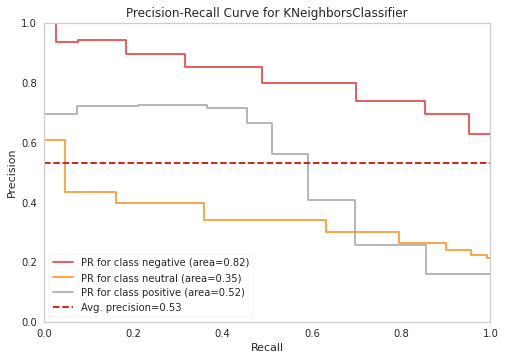

In [42]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=8),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [43]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_AP_neg = viz.score_["negative"]

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 42, random_state = 10) 
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=42, random_state=10)

In [45]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2239   24   31]
 [ 651   84   40]
 [ 307    8  276]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      2294
     neutral       0.72      0.11      0.19       775
    positive       0.80      0.47      0.59       591

    accuracy                           0.71      3660
   macro avg       0.74      0.52      0.53      3660
weighted avg       0.72      0.71      0.65      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.75      1.00      0.86      6884
     neutral       0.97      0.24      0.39      2324
    positive       0.93      0.65      0.77      1772

    accuracy                           0.78     10980
   macro avg       0.88      0.63      0.67     10980
weighted avg       0.82      0.78      0.74     10980



In [46]:
model = RandomForestClassifier(max_depth = 42, random_state = 10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.714026
test_precision-neg    0.703579
test_recall-neg       0.981405
test_f1-neg           0.819573
dtype: float64

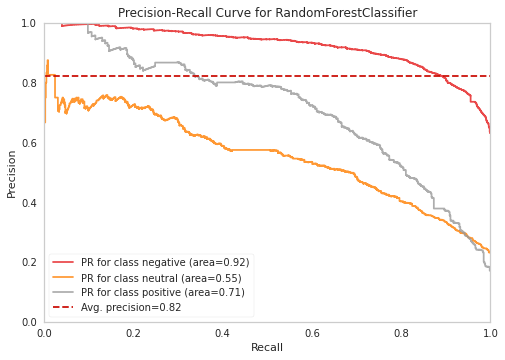

In [47]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(max_depth = 42, random_state = 10),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [48]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_AP_neg = viz.score_["negative"]

## XG Boost

In [49]:
 pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=10, max_depth = 7)
xgb.fit(X_train_count, y_train)

XGBClassifier(max_depth=7, objective='multi:softprob', random_state=10)

In [51]:
print("XG Boost MODEL")
eval(xgb, X_train_count, X_test_count)

XG Boost MODEL
[[2186   36   72]
 [ 585  131   59]
 [ 238   16  337]]
Test_Set
              precision    recall  f1-score   support

    negative       0.73      0.95      0.82      2294
     neutral       0.72      0.17      0.27       775
    positive       0.72      0.57      0.64       591

    accuracy                           0.73      3660
   macro avg       0.72      0.56      0.58      3660
weighted avg       0.72      0.73      0.68      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      6884
     neutral       0.87      0.23      0.36      2324
    positive       0.80      0.64      0.71      1772

    accuracy                           0.76     10980
   macro avg       0.81      0.61      0.64     10980
weighted avg       0.78      0.76      0.72     10980



In [52]:
model = xgb = XGBClassifier(random_state=10, max_depth = 7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.730692
test_precision-neg    0.730065
test_recall-neg       0.958017
test_f1-neg           0.828631
dtype: float64

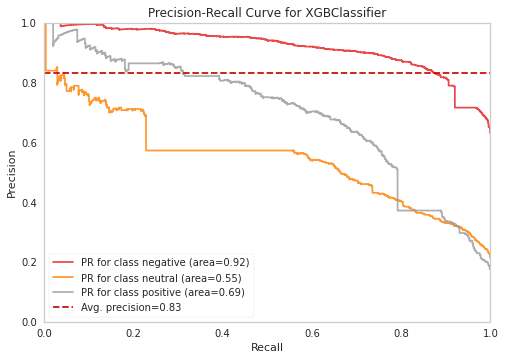

In [56]:
viz = PrecisionRecallCurve(
    XGBClassifier(random_state=10, max_depth = 7),
    classes=xgb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [57]:
y_pred = xgb.predict(X_test_count)
xgb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
xgb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
xgb_AP_neg = viz.score_["negative"]

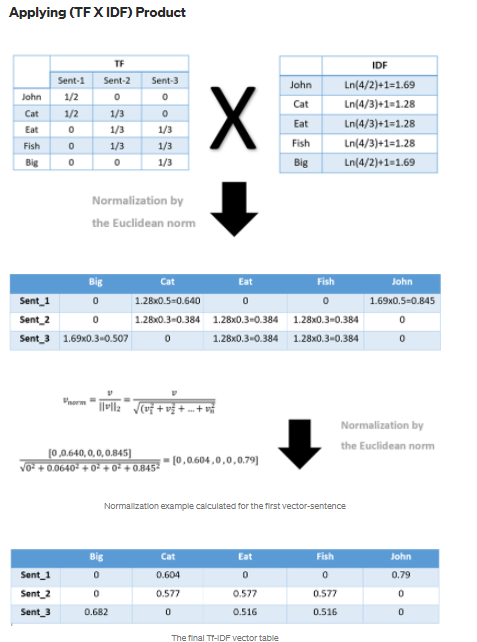

## TF ( Time Frequency ) - IDF ( Inverse Document Frequency )

https://towardsdatascience.com/how-sklearns-tf-idf-is-different-from-the-standard-tf-idf-275fa582e73d

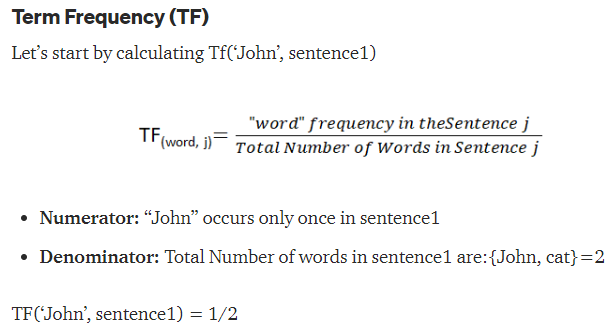

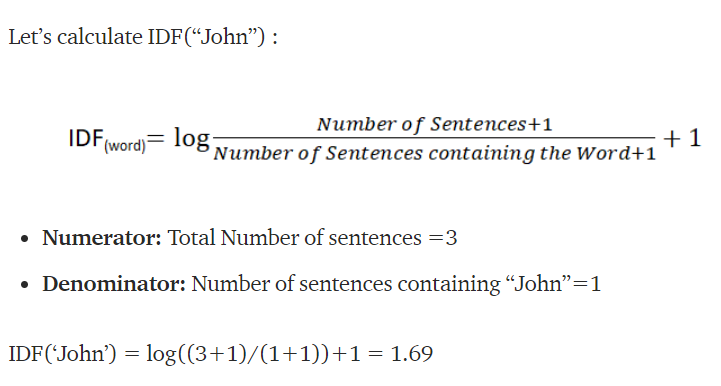

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [60]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,accommodate,accommodating,accommodation,according,accordingly,...,yay,yea,yeah,year,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329685,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
10976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
10977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
10978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## Model Comparisons  TF-IDF

## Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=2)
nb.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=2)

In [63]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[2274   18    2]
 [ 613  145   17]
 [ 391   25  175]]
Test_Set
              precision    recall  f1-score   support

    negative       0.69      0.99      0.82      2294
     neutral       0.77      0.19      0.30       775
    positive       0.90      0.30      0.45       591

    accuracy                           0.71      3660
   macro avg       0.79      0.49      0.52      3660
weighted avg       0.74      0.71      0.65      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.71      0.99      0.83      6884
     neutral       0.85      0.24      0.37      2324
    positive       0.92      0.37      0.52      1772

    accuracy                           0.73     10980
   macro avg       0.83      0.53      0.58     10980
weighted avg       0.77      0.73      0.68     10980



In [64]:
model = MultinomialNB(alpha=2)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.704736
test_precision-neg    0.690560
test_recall-neg       0.991138
test_f1-neg           0.813970
dtype: float64

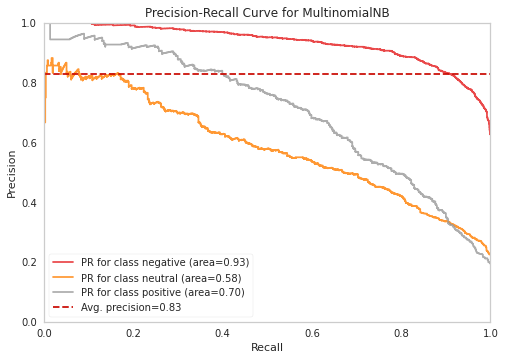

In [65]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=2),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [66]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_AP_neg = viz.score_["negative"]

## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.3, max_iter=1500)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.3, max_iter=1500)

In [68]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[2223   59   12]
 [ 459  276   40]
 [ 228   62  301]]
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      2294
     neutral       0.70      0.36      0.47       775
    positive       0.85      0.51      0.64       591

    accuracy                           0.77      3660
   macro avg       0.77      0.61      0.65      3660
weighted avg       0.76      0.77      0.74      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.79      0.98      0.87      6884
     neutral       0.81      0.45      0.58      2324
    positive       0.87      0.57      0.69      1772

    accuracy                           0.80     10980
   macro avg       0.82      0.67      0.72     10980
weighted avg       0.81      0.80      0.78     10980



In [69]:
model = LogisticRegression(C=0.3, max_iter=1500)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.758379
test_precision-neg    0.756928
test_recall-neg       0.966006
test_f1-neg           0.848763
dtype: float64

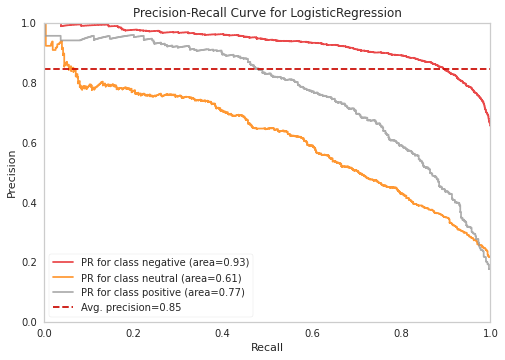

In [70]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.3, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [71]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_AP_neg = viz.score_["negative"]

## SVM

In [72]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [73]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2189   80   25]
 [ 394  326   55]
 [ 173   59  359]]
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.95      0.87      2294
     neutral       0.70      0.42      0.53       775
    positive       0.82      0.61      0.70       591

    accuracy                           0.79      3660
   macro avg       0.77      0.66      0.70      3660
weighted avg       0.78      0.79      0.77      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.97      0.89      6884
     neutral       0.83      0.54      0.65      2324
    positive       0.87      0.68      0.76      1772

    accuracy                           0.83     10980
   macro avg       0.84      0.73      0.77     10980
weighted avg       0.83      0.83      0.82     10980



In [74]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.775228
test_precision-neg    0.782308
test_recall-neg       0.954676
test_f1-neg           0.859922
dtype: float64

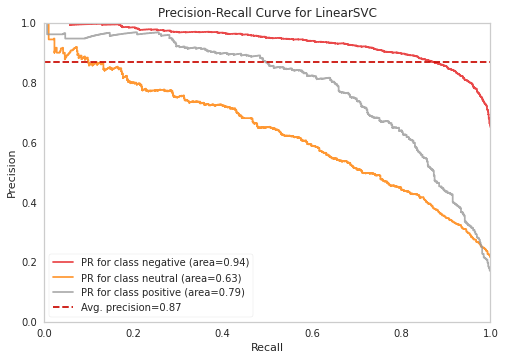

In [75]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [76]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_AP_neg = viz.score_["negative"]

## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=8)

In [78]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

KNN MODEL
[[ 359 1932    3]
 [  89  667   19]
 [  66  413  112]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.16      0.26      2294
     neutral       0.22      0.86      0.35       775
    positive       0.84      0.19      0.31       591

    accuracy                           0.31      3660
   macro avg       0.59      0.40      0.31      3660
weighted avg       0.62      0.31      0.28      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.31      0.46      6884
     neutral       0.26      0.90      0.40      2324
    positive       0.87      0.21      0.34      1772

    accuracy                           0.42     10980
   macro avg       0.66      0.48      0.40     10980
weighted avg       0.73      0.42      0.43     10980



In [79]:
model = KNeighborsClassifier(n_neighbors=8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.307650
test_precision-neg    0.722392
test_recall-neg       0.158626
test_f1-neg           0.258252
dtype: float64

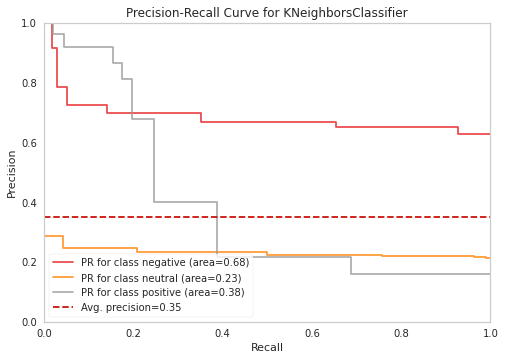

In [80]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=8),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [81]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_AP_neg = viz.score_["negative"]

## RandomForest

In [82]:
rf = RandomForestClassifier(max_depth = 55, random_state = 10)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=55, random_state=10)

In [83]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2233   29   32]
 [ 613  119   43]
 [ 287   12  292]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.97      0.82      2294
     neutral       0.74      0.15      0.25       775
    positive       0.80      0.49      0.61       591

    accuracy                           0.72      3660
   macro avg       0.75      0.54      0.56      3660
weighted avg       0.73      0.72      0.67      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.79      1.00      0.88      6884
     neutral       0.98      0.44      0.61      2324
    positive       0.96      0.70      0.81      1772

    accuracy                           0.83     10980
   macro avg       0.91      0.71      0.77     10980
weighted avg       0.86      0.83      0.81     10980



In [84]:
model = RandomForestClassifier(max_depth = 55, random_state = 10)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.726594
test_precision-neg    0.714304
test_recall-neg       0.981261
test_f1-neg           0.826764
dtype: float64

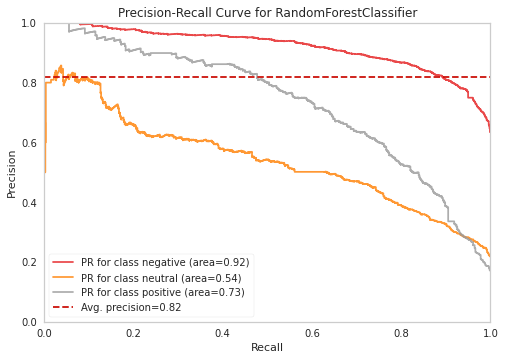

In [85]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [86]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_AP_neg = viz.score_["negative"]

## XG Boost

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=10, max_depth = 5)
xgb.fit(X_train_tf_idf, y_train)

XGBClassifier(max_depth=5, objective='multi:softprob', random_state=10)

In [88]:
print("XG Boost MODEL")
eval(xgb, X_train_tf_idf, X_test_tf_idf)

XG Boost MODEL
[[2213   22   59]
 [ 630   90   55]
 [ 252    9  330]]
Test_Set
              precision    recall  f1-score   support

    negative       0.72      0.96      0.82      2294
     neutral       0.74      0.12      0.20       775
    positive       0.74      0.56      0.64       591

    accuracy                           0.72      3660
   macro avg       0.73      0.55      0.55      3660
weighted avg       0.73      0.72      0.66      3660

Train_Set
              precision    recall  f1-score   support

    negative       0.73      0.98      0.84      6884
     neutral       0.92      0.18      0.30      2324
    positive       0.82      0.60      0.70      1772

    accuracy                           0.75     10980
   macro avg       0.82      0.59      0.61     10980
weighted avg       0.79      0.75      0.70     10980



In [89]:
model = XGBClassifier(random_state=10, max_depth = 5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.720583
test_precision-neg    0.716372
test_recall-neg       0.967025
test_f1-neg           0.823029
dtype: float64

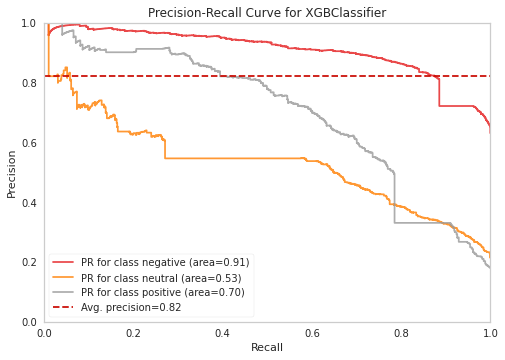

In [90]:
viz = PrecisionRecallCurve(
    XGBClassifier(random_state=10, max_depth = 5),
    classes=xgb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [91]:
y_pred = xgb.predict(X_test_tf_idf)
xgb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
xgb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
xgb_tfidf_AP_neg = viz.score_["negative"]

## Compare Scoring

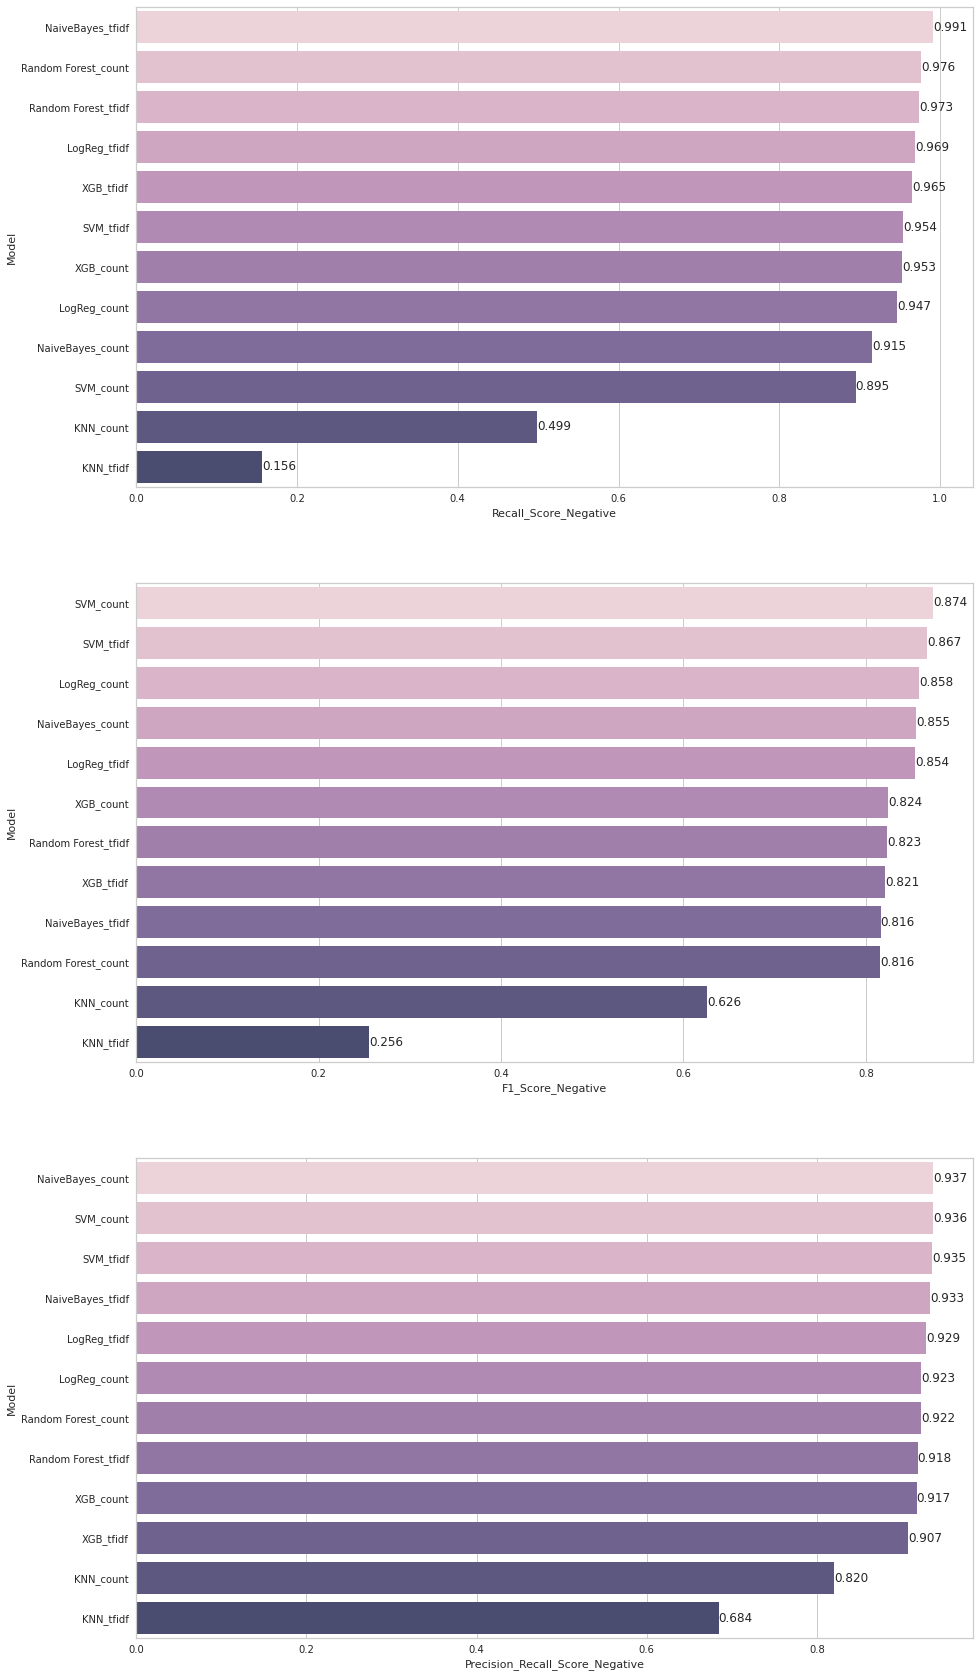

In [92]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "XGB_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "XGB_tfidf"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], knn_count_f1_neg[0],
                                             rf_count_f1_neg[0], xgb_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], xgb_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], 
                                                  knn_count_rec_neg[0], rf_count_rec_neg[0], xgb_count_rec_neg[0], 
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0], 
                                                  knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], xgb_tfidf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg,
                                                          xgb_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                           knn_tfidf_AP_neg, rf_tfidf_AP_neg, xgb_tfidf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="ch:8.5,.5,dark=.3")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="ch:8.5,.5,dark=.3")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="ch:8.5,.5,dark=.3")
labels(ax)
plt.show();

## For New Tweets, prediction with pipeline


In [93]:
from sklearn.pipeline import Pipeline

In [94]:
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=3)),('log',LogisticRegression(C=0.4, max_iter=1000))])

In [95]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x7fc53bd40b00>)),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

In [96]:
tweet = "it was not the worst flight i have ever been"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [97]:
tweet = "customer sevices were slow"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [98]:
tweet = "didn't enjoy flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [99]:
tweet = "it was not amazing"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [100]:
tweet = "don't enjoy flight at all"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [101]:
tweet = "I don't think I'll ever use American Airlines any more"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

## Collecting and Counting words

In [102]:
tweets = cleaning_text
tweets

0                                                     said
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight no warning communic...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [103]:
all_words = " ".join(tweets)

In [104]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

In [105]:
counter = Counter(word_tokenize(all_words))

In [106]:
counter.most_common()

[('flight', 4517),
 ('not', 1620),
 ('no', 1486),
 ('get', 1374),
 ('hour', 1136),
 ('thanks', 1071),
 ('cancelled', 1048),
 ('u', 994),
 ('service', 987),
 ('time', 942),
 ('customer', 928),
 ('help', 848),
 ('bag', 762),
 ('im', 743),
 ('plane', 722),
 ('amp', 678),
 ('hold', 641),
 ('need', 633),
 ('thank', 601),
 ('one', 580),
 ('still', 576),
 ('cant', 574),
 ('please', 561),
 ('call', 561),
 ('would', 549),
 ('day', 546),
 ('airline', 545),
 ('gate', 539),
 ('delayed', 529),
 ('back', 524),
 ('flightled', 506),
 ('dont', 489),
 ('seat', 480),
 ('got', 480),
 ('phone', 453),
 ('delay', 434),
 ('like', 431),
 ('today', 426),
 ('late', 424),
 ('guy', 422),
 ('agent', 415),
 ('fly', 380),
 ('ticket', 380),
 ('know', 378),
 ('make', 375),
 ('waiting', 364),
 ('airport', 363),
 ('change', 359),
 ('way', 358),
 ('trying', 348),
 ('minute', 345),
 ('go', 336),
 ('great', 334),
 ('ive', 328),
 ('wait', 326),
 ('going', 324),
 ('never', 318),
 ('problem', 312),
 ('min', 309),
 ('tomorrow',

In [107]:
for i in counter.most_common():
    if "enjoy" == i[0]:
        print(i)

('enjoy', 21)


In [108]:
for i in counter.most_common():
    if "love" == i[0]:
        print(i)

('love', 236)


In [109]:
for i in counter.most_common():
    if "like" == i[0]:
        print(i)

('like', 431)


In [110]:
counter = 0
for i,j in enumerate(tweets):
    if "love" in j and "dont" in j and y[i]=="negative":
        counter += 1
print(counter)    

5


In [111]:
counter = 0
for i,j in enumerate(tweets):
    if "like" in j and "dont" in j and y[i]=="negative":
        counter += 1
print(counter)

30


In [112]:
counter = 0
for i,j in enumerate(tweets):
    if "like" in j and "didnt" in j and y[i]=="negative":
        counter += 1
print(counter)

4


In [113]:
counter = 0
for i,j in enumerate(tweets):
    if "amazing" in j and "wasnt" in j and y[i]=="negative":
        counter += 1
print(counter)

0


In [114]:
counter = 0
for i,j in enumerate(tweets):
    if "love" in j and y[i]=="neutral":
        counter += 1
print(counter)

48


## WordCloud - Repetition of Words

## Collect Words

In [115]:
all_words = " ".join(tweets)

In [116]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

## Create Word Cloud

In [117]:
from wordcloud import WordCloud

In [118]:
worldcloud = WordCloud(background_color="black", max_words =200, mode="RGB")

In [119]:
worldcloud.generate(all_words)

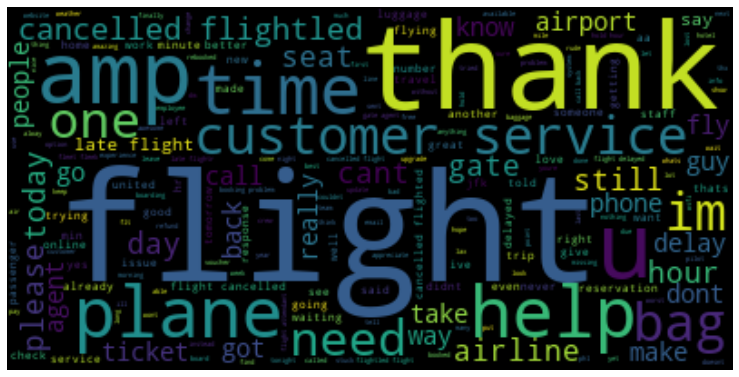

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

_THE_ _END_